In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('train_task3.csv')

df.head()

,name,area_size,population,planning_area,cando_count,hdb_count,landed_count,size_sqft,subzone_per_price_encoded
0,ang mo kio town centre,0.3169,4810,ang mo kio,5,5,0,1037.500000,1315.262985
1,cheng san,0.9557,28070,ang mo kio,0,99,0,891.202020,679.221584
2,chong boon,1.0786,26500,ang mo kio,0,51,0,1379.862069,877.132988
3,kebun bahru,1.0464,22620,ang mo kio,4,22,0,2099.904762,1008.119300
4,sembawang hills,0.8945,6850,ang mo kio,3,0,0,4043.828571,1688.601132


In [3]:
t = df.groupby(['planning_area']).mean()
t.head()

,area_size,population,cando_count,hdb_count,landed_count,size_sqft,subzone_per_price_encoded
planning_area,,,,,,,
ang mo kio,1.134364,14751.818182,25.363636,24.363636,0.0,1634.771690,1152.735194
bedok,2.709875,34623.750000,46.000000,29.750000,0.0,2164.425144,1322.198046
bishan,2.536033,29106.666667,15.666667,52.666667,0.0,1681.243904,1182.434714
bukit batok,1.237811,17561.111111,32.111111,26.555556,0.0,1269.618708,1016.994860
bukit merah,0.685881,9453.125000,16.375000,17.937500,0.0,1183.026746,1183.121486


In [4]:
t1 = t['size_sqft']
df['per_size'] = df['planning_area'].map(t1)
df.head()

,name,area_size,population,planning_area,cando_count,hdb_count,landed_count,size_sqft,subzone_per_price_encoded,per_size
0,ang mo kio town centre,0.3169,4810,ang mo kio,5,5,0,1037.500000,1315.262985,1634.77169
1,cheng san,0.9557,28070,ang mo kio,0,99,0,891.202020,679.221584,1634.77169
2,chong boon,1.0786,26500,ang mo kio,0,51,0,1379.862069,877.132988,1634.77169
3,kebun bahru,1.0464,22620,ang mo kio,4,22,0,2099.904762,1008.119300,1634.77169
4,sembawang hills,0.8945,6850,ang mo kio,3,0,0,4043.828571,1688.601132,1634.77169


In [5]:
t2 = t['area_size']
df['per_area_size'] = df['planning_area'].map(t2)
df.head()

,name,area_size,population,planning_area,cando_count,hdb_count,landed_count,size_sqft,subzone_per_price_encoded,per_size,per_area_size
0,ang mo kio town centre,0.3169,4810,ang mo kio,5,5,0,1037.500000,1315.262985,1634.77169,1.134364
1,cheng san,0.9557,28070,ang mo kio,0,99,0,891.202020,679.221584,1634.77169,1.134364
2,chong boon,1.0786,26500,ang mo kio,0,51,0,1379.862069,877.132988,1634.77169,1.134364
3,kebun bahru,1.0464,22620,ang mo kio,4,22,0,2099.904762,1008.119300,1634.77169,1.134364
4,sembawang hills,0.8945,6850,ang mo kio,3,0,0,4043.828571,1688.601132,1634.77169,1.134364


In [6]:
t3 = t['subzone_per_price_encoded']
df['per_price'] = df['planning_area'].map(t3)
df.head()
df.to_csv('task3.csv', index=False)

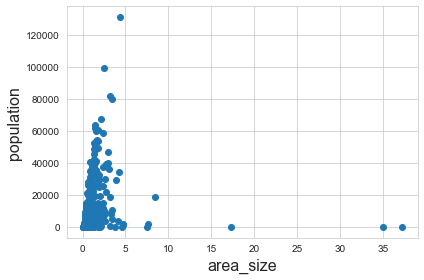

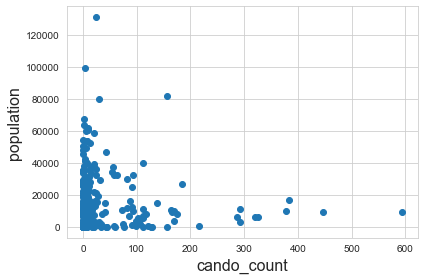

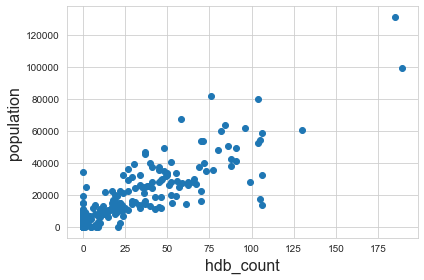

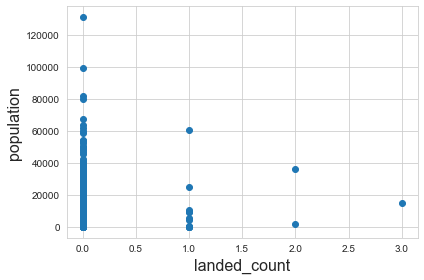

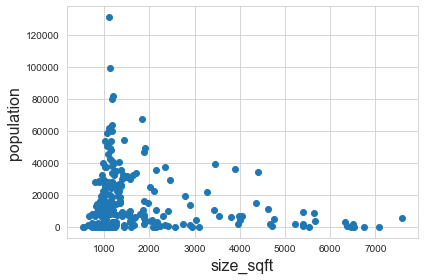

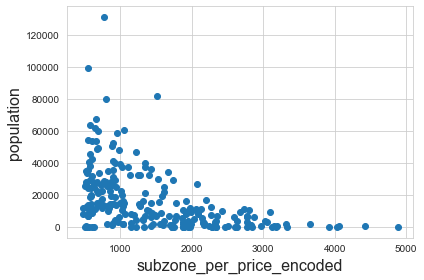

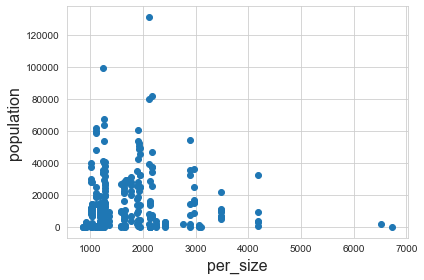

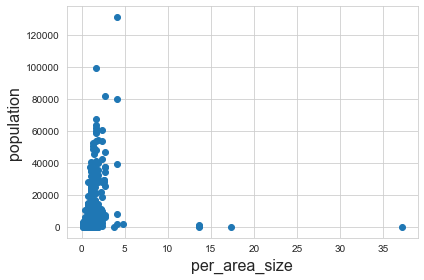

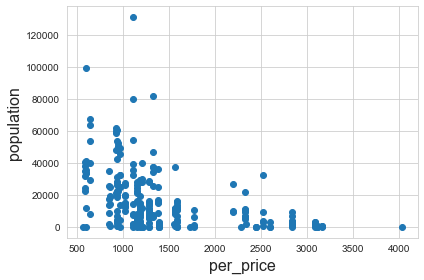

In [7]:
index = ['area_size', 'cando_count', 'hdb_count', 'landed_count', 'size_sqft', 'subzone_per_price_encoded', 'per_size', 'per_area_size', 'per_price']
df_x = df[index]
df_y = df['population']
for i in index:
    plt.figure()
    plt.scatter(df[i], df_y)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('population', fontsize=16)
    plt.tight_layout()
    plt.show()

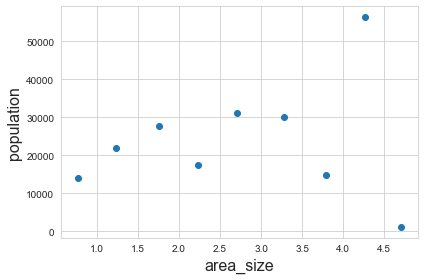

In [8]:
df1 = df.loc[df['area_size']<=0.5]

t = []
x = []
y = []
t.append(df1)
for i in range(10):
    dft = df.loc[np.logical_and(df['area_size']<=0.5*(i+2), df['area_size']>0.5*(i+1))]
    t.append(dft)
    x.append(dft['area_size'].mean())
    y.append(dft['population'].mean())

plt.figure()
plt.scatter(x, y)
plt.xlabel('area_size', fontsize=16)
plt.ylabel('population', fontsize=16)
plt.tight_layout()
plt.show()

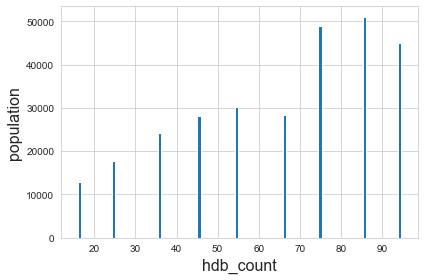

In [9]:
df1 = df.loc[df['hdb_count']<=10]
df2 = df.loc[df['hdb_count']>100]
t = []
x = []
y = []
t.append(df1)
for i in range(9):
    dft = df.loc[np.logical_and(df['hdb_count']<=10*(i+2), df['hdb_count']>10*(i+1))]
    t.append(dft)
    x.append(dft['hdb_count'].mean())
    y.append(dft['population'].mean())
t.append(df2)
plt.figure()
plt.bar(x, y)
plt.xlabel('hdb_count', fontsize=16)
plt.ylabel('population', fontsize=16)
plt.tight_layout()
plt.show()

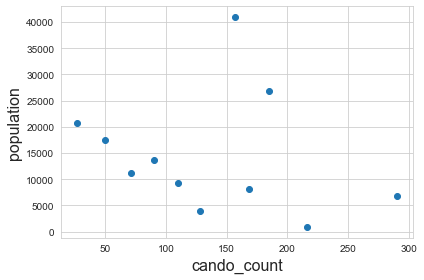

In [10]:
df1 = df.loc[df['cando_count']<=10]
df2 = df.loc[df['cando_count']>300]
t = []
x = []
y = []
t.append(df1)
for i in range(14):
    dft = df.loc[np.logical_and(df['cando_count']<=20*(i+2), df['cando_count']>20*(i+1))]
    t.append(dft)
    x.append(dft['cando_count'].mean())
    y.append(dft['population'].mean())
t.append(df2)
plt.figure()
plt.scatter(x, y)
plt.xlabel('cando_count', fontsize=16)
plt.ylabel('population', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
# print(df.corr())
# print(df.corr('kendall'))
# print(df.corr('spearman'))
# df_p = df.iloc['population'].corr()
# print(df_p)
# data_corr = np.array(df.corr()['population']).reshape(1, 10)
# ax = sns.heatmap(data_corr, annot=True, fmt=".1f")
# ax.set(xlabel=df.columns.values.tolist(), ylabel="population")

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


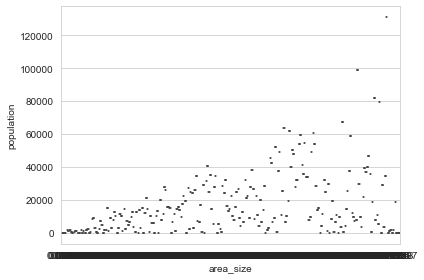

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


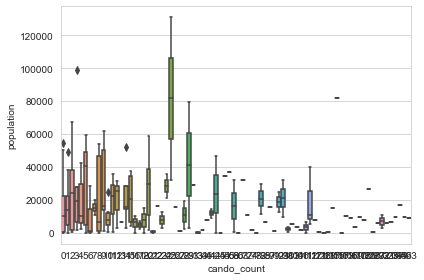

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


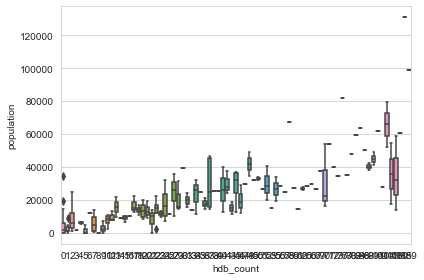

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


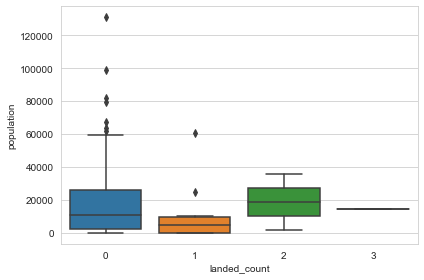

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


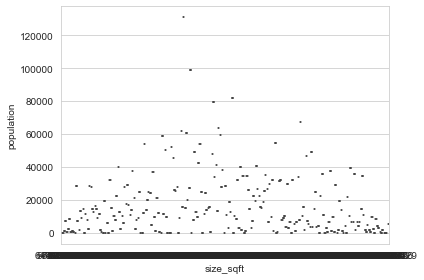

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


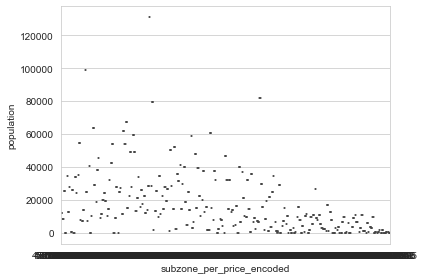

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


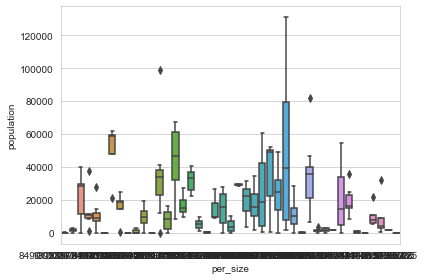

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


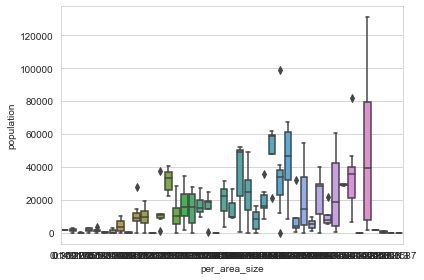

/Users/gloria/opt/anaconda3/envs/cs5228/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


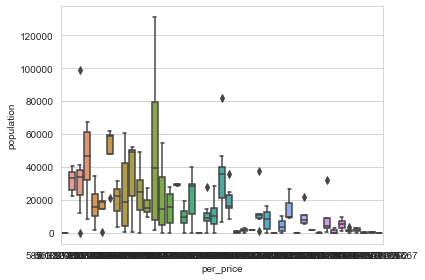

In [12]:
for i in index:
    sns.boxplot(df_x[i], df_y)
    plt.tight_layout()
    plt.show()

In [16]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_x.to_numpy()
Y = df_y.to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=43)

ss_x = StandardScaler()
train_x = ss_x.fit_transform(train_x)
test_x = ss_x.transform(test_x)

svr = SVR()
scorer = make_scorer(mean_squared_error, greater_is_better=False)
parameters = [{'kernel': ['rbf', 'poly', 'sigmoid'], 'gamma': [1e-3, 0.01, 1/15, 1/8], 'C': [1]}]  # , 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr = GridSearchCV(svr, parameters, cv=5, scoring=scorer)
svr.fit(train_x, train_y)
print(svr.best_params_)

predict = svr.predict(test_x)

RMSE = np.mean(np.square(test_y-predict))
print('RMSE of test dataset: {}'.format(RMSE))

Tuning hyper-parameters
{'C': 1, 'gamma': 0.125, 'kernel': 'poly'}
RMSE of test dataset: 316809375.91767997
